In [1]:
from Image import Image
import numpy as np
import matplotlib.pyplot as plt

from ImageAnalysis import *

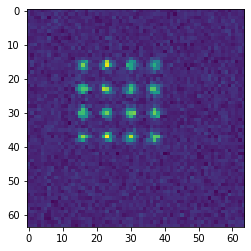

In [154]:
lattice_shape = np.array([4, 4])

img = Image(64, 64, np.array([8, 0]), np.array([0, 8]), np.array([16, 16]), lattice_shape, 100, 1)
img.populate_image(np.ones((4, 4)), 1, 50, 100)

plt.imshow(img.get_img())
plt.show()

[[ 0.        ]
 [44.68042885]]


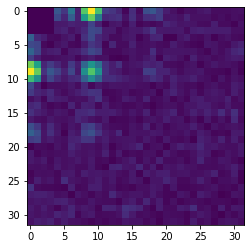

In [158]:
spectral_content = np.fft.fft2(img.get_img() - img.get_img().mean())
spectral_content = spectral_content[:spectral_content.shape[0] // 2, :spectral_content.shape[1] // 2]

min_rlattice_constant_x, min_rlattice_constant_y = lattice_shape[0], lattice_shape[1]

# Only look for lattice constants outside the square given by (lattice_shape[0], lattice_shape[1])
# Anything inside would correspond to the lattice not being entirely contained within the image

spectral_content[:lattice_shape[0], :lattice_shape[1]] = np.zeros(lattice_shape)

b0_val = np.sort(np.absolute(spectral_content), axis=None)[-1]
b1_val = np.sort(np.absolute(spectral_content), axis=None)[-2]

b0 = np.array(np.where(np.isclose(np.absolute(spectral_content), b0_val))) / 64
b1 = np.array(np.where(np.isclose(np.absolute(spectral_content), b1_val))) / 64

#print(b0)
#print(b1)

rotate = np.array([[0, -1], [1, 0]])

rot_b0 = np.matmul(rotate, b0)
rot_b1 = np.matmul(rotate, b1)

a0 = 2 * np.pi * rot_b1 / np.dot(b0.flatten(), rot_b1.flatten())
a1 = 2 * np.pi * rot_b0 / np.dot(b1.flatten(), rot_b0.flatten())

print(a0)

plt.imshow(np.absolute(spectral_content))
plt.show()